In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import nc_time_axis
import netCDF4

import cartopy.crs as ccrs
import seaborn

import matplotlib.pyplot as plt

from glob import glob

from dask.utils import format_bytes
import time

In [2]:
dcfgpth = '/dssgfs01/scratch/atb299/NEMO/MLF/nemo/cfgs/eORCA025/BASE/domcfg.nc'
dcfg = xr.open_dataset(dcfgpth)

In [3]:
paths = '/dssgfs01/scratch/atb299/NEMO/MLF/nemo/cfgs/eORCA025/EXP00/TIDY/????/eORCA025_1y_*_grid_T_*-*.nc'
ds = xr.open_mfdataset(paths, combine='by_coords',parallel=True)

In [4]:
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

coast_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',
                                        facecolor='none')

coast_10m = cfeature.NaturalEarthFeature('physical', 'coastline', '10m',
                                        edgecolor='black',
                                        facecolor='none')

topog = cfeature.NaturalEarthFeature(
    category='raster',
    name='natural_earth_hypsometric',
    scale='50m',
    facecolor='none')

In [5]:
def gplot(var=None,vmin=None,vmax=None,cmap=None):
    plt.figure(figsize=(16, 6))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.set_global()
    var.plot.pcolormesh(ax=ax, shading='auto', x="nav_lon", y="nav_lat", 
                                     vmin=vmin, vmax=vmax,cmap=cmap,
                                     transform=ccrs.PlateCarree(), add_colorbar=True
    );
    ax.add_feature(land_50m)
    ax.add_feature(coast_50m)
    # ax.set_ylim([-85, 90]);

    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

### Annual mean SSH, SST and SSS at year 6

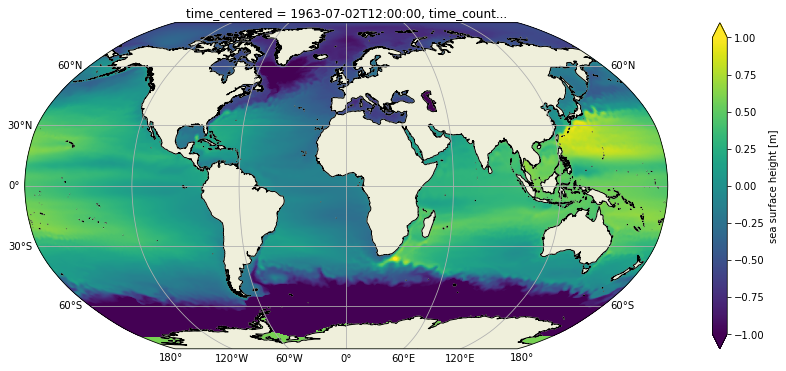

In [6]:
gplot(var=ds["zos"][5,:,:],vmin=-1,vmax=1,cmap=None)

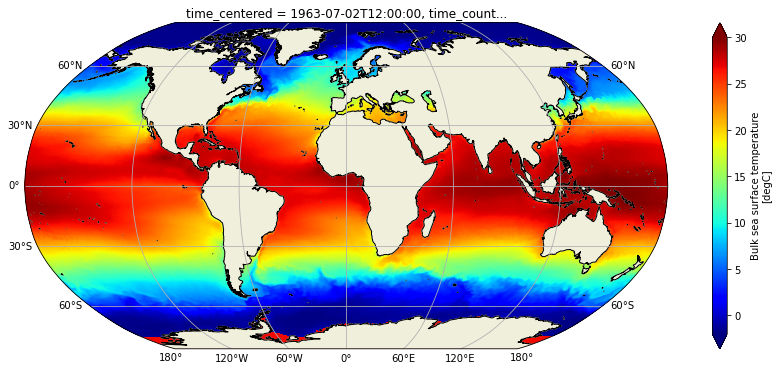

In [7]:
gplot(var=ds["tos"][5,:,:],vmin=-2,vmax=30,cmap="jet")

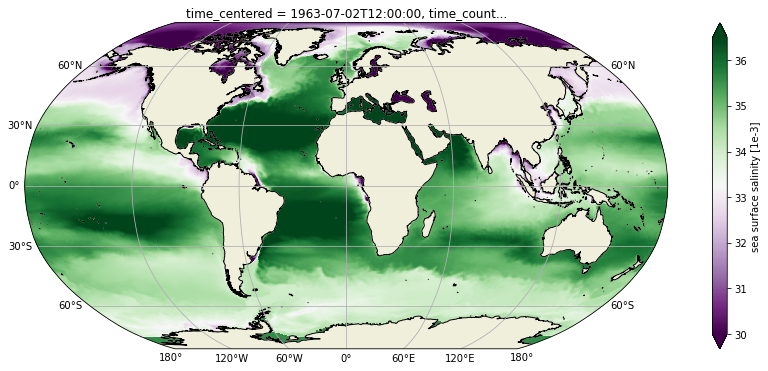

In [8]:
gplot(var=ds["sos"][5,:,:],vmin=30,vmax=36.5,cmap="PRGn")

In [9]:
ds

<xarray.Dataset>
Dimensions:               (y: 1206, x: 1440, deptht: 75, time_counter: 46,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(1206, 1440), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1206, 1440), meta=np.ndarray>
  * deptht                (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 1958-07-02T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/28)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    e3t                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 1206, 1440), meta=np.ndarray>
    thetao                (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 1206, 1440), meta=np.ndarray>
    thetao_pot            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 1206, 1440), meta=np.ndarray>
    ...                    ...
    qt_oce                (time_counter, y, x) float32 dask.array<chunksize=(1, 1206, 1440), meta=np.ndarray>
    sfx                   (time_counter, y, x) float32 dask.array<chunksize=(1, 1206, 1440), meta=np.ndarray>
    taum                  (time_counter, y, x) float32 dask.array<chunksize=(1, 1206, 1440), meta=np.ndarray>
    windsp                (time_counter, y, x) float32 dask.array<chunksize=(1, 1206, 1440), meta=np.ndarray>
    precip                (time_counter, y, x) float32 dask.array<chunksize=(1, 1206, 1440), meta=np.ndarray>
    snowpre               (time_counter, y, x) float32 dask.array<chunksize=(1, 1206, 1440), meta=np.ndarray>
Attributes:
    name:         MEANS_OUT/eORCA025_1y_19580101_19611231_grid_T
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2022-Oct-19 21:43:07 GMT
    uuid:         261a3b52-3acd-483b-a1ae-5e4c204547d8
    ibegin:       0
    ni:           1440
    jbegin:       0
    nj:           51
    file_name:    ../MEANS_OUT/eORCA025_1y_19580101_19611231_grid_T_1958-1958.nc
    TimeStamp:    20/10/2022 10:28:15 +0100

### Compute and plot differences between year 2003 and year 1958

In [10]:
zdiff = ds["zos"][45,:,:] - ds["zos"][0,:,:]
tdiff = ds["tos"][45,:,:] - ds["tos"][0,:,:]
sdiff = ds["sos"][45,:,:] - ds["sos"][0,:,:]

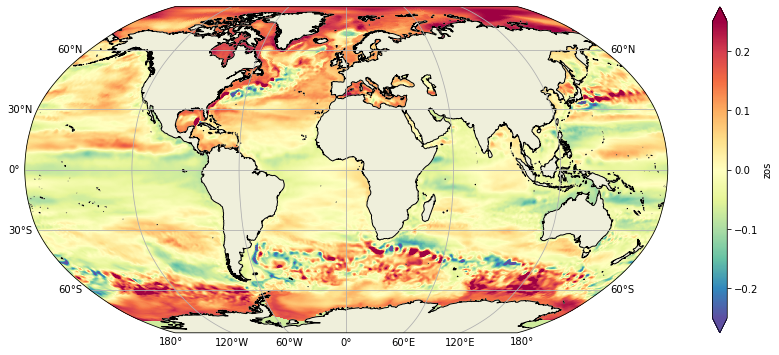

In [11]:
gplot(var=zdiff,vmin=-.25,vmax=.25,cmap="Spectral_r")

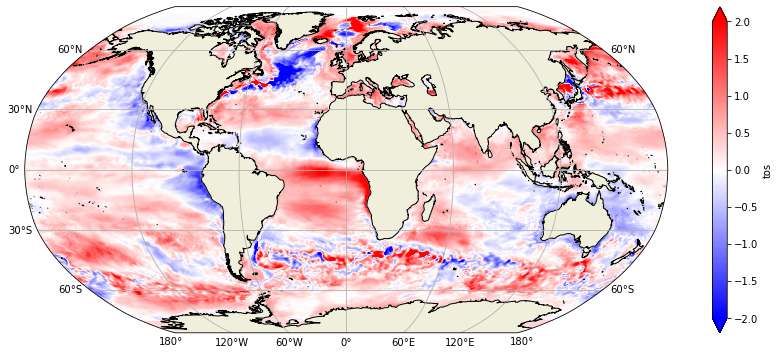

In [12]:
gplot(var=tdiff,vmin=-2,vmax=2,cmap="bwr")

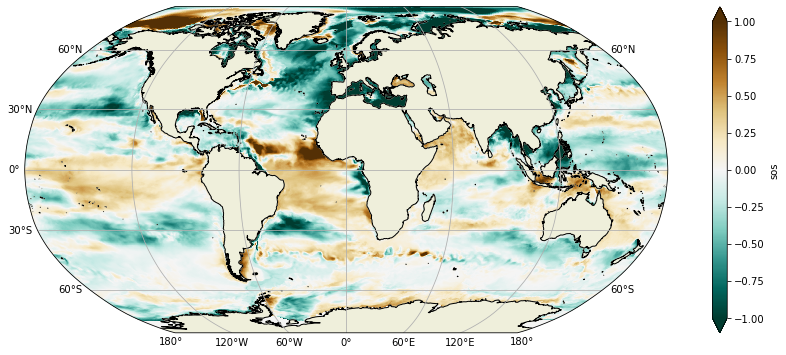

In [23]:
gplot(var=sdiff,vmin=-1,vmax=1,cmap="BrBG_r")

## Time-depth series evaluation

In [14]:
paths = '/dssgfs01/working/atb299/Wishbone/Analysis/means/GlobalT/eORCA025_1y_*_meanT.nc'
dsT = xr.open_mfdataset(paths, combine='by_coords',parallel=True)
paths = '/dssgfs01/working/atb299/Wishbone/Analysis/means/GlobalS/eORCA025_1y_*_meanS.nc'
dsS = xr.open_mfdataset(paths, combine='by_coords',parallel=True)

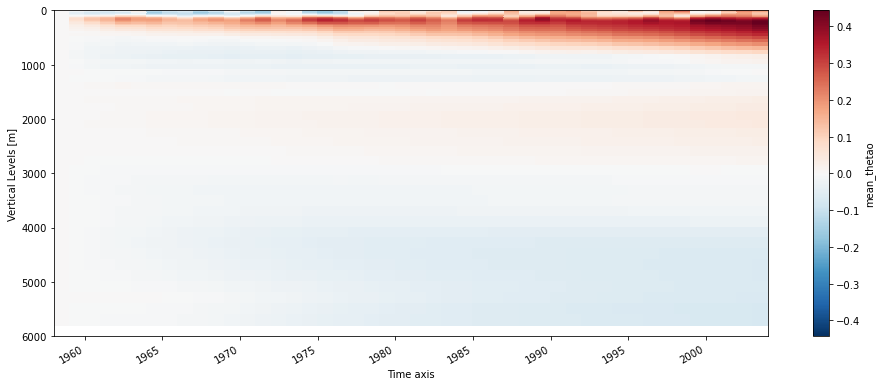

In [15]:
plt.figure(figsize=(16, 6));
(dsT['mean_thetao']-dsT['mean_thetao'][0,:]).plot(x='time_counter',yincrease=False);

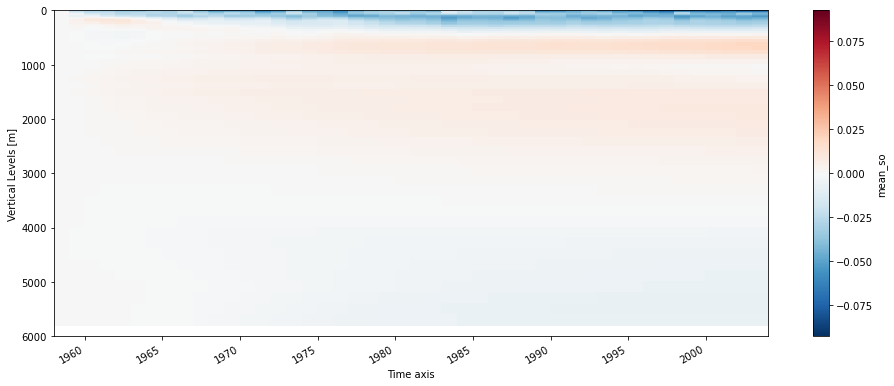

In [16]:
plt.figure(figsize=(16, 6));
(dsS['mean_so']-dsS['mean_so'][0,:]).plot(x='time_counter',yincrease=False);

## AMOC analysis/plots

In [17]:
def moc_proc(ds):  
    # Coordinate variables are not assigned
    ds = ds.squeeze()
    ds['nav_lat'] = ds['nav_lat'].sel(time_counter=ds['time_counter'][0]).drop('time_counter')
    ds['nav_lon'] = ds['nav_lon'].sel(time_counter=ds['time_counter'][0]).drop('time_counter')
    #ds['depthv'] = (ds['depthv']*-1).sel(time_counter=ds['time_counter'][0]).drop('time_counter')

    # CDFtool has used 0. as missing value for latitude, so replace with nan...
    #ds['nav_lat'][:500] = ds['nav_lat'][:500].where(ds['nav_lat'][:500] != 0.,np.nan)
    #ds['nav_lat'][-800:] = ds['nav_lat'][-800:].where(ds['nav_lat'][-800:] != 0.,np.nan)

    ds=ds.assign_coords({"y": ds['nav_lat']})
    #ds=ds.assign_coords({"depthw": ds['depthv']})
    
    return ds

In [18]:
def amoc_proc(moc):
    # Something not quite right with latitudes, so constrain values to 1590:2992 for now...
    ds = moc['zomsfatl'][:,:,535:-2].to_dataset(name="AMOC")
    ds = ds.where(ds != 0.,np.nan)
    ds['AMOC_mean'] = ds['AMOC'].mean('time_counter', skipna=True)
    ds['AMOC_std'] = ds['AMOC'].std('time_counter', skipna=True)
    ds['AMOC26'] = ds['AMOC'].sel(y = 26, method="nearest")
    ds['AMOC26_1k'] = ds['AMOC26'].sel(depthw = (-1000), method="nearest")
    #ds['AMOC26_1k_sc'] = ds['AMOC26_1k'].groupby('time_counter.month').mean("time_counter")
    #ds['AMOC26_1k_ym'] = reshym(AMOC26_1k)
    return ds

In [19]:
paths = '/dssgfs01/working/atb299/Wishbone/Analysis/means/moc/eORCA025_1y_*_moc.nc'
MOC  = moc_proc(xr.open_mfdataset(paths,use_cftime=True))
AMOC = amoc_proc(MOC)

In [20]:
def amoc_plot(amoc):
    amoc['AMOC_mean'].plot( extend='both', levels=20, aspect=4, size=4, yincrease=True); plt.title("AMOC mean");
    amoc['AMOC_std'].plot( extend='both', levels=20, aspect=4, size=4, yincrease=True); plt.title("AMOC standard deviation");
    amoc['AMOC26'].plot(x='time_counter', extend='both', levels=20, aspect=4, size=4, yincrease=True); plt.title("AMOC @26N");
    amoc['AMOC26_1k'].plot(x='time_counter', aspect=4, size=4); plt.title("AMOC @26N, 1km depth");
    #amoc['AMOC26_1k_sc'].plot(aspect=4, size=4); plt.title("Mean seasonal cycle of AMOC @26N, 1km depth");

/dssgfs01/working/atb299/Miniconda/envs/Sci/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


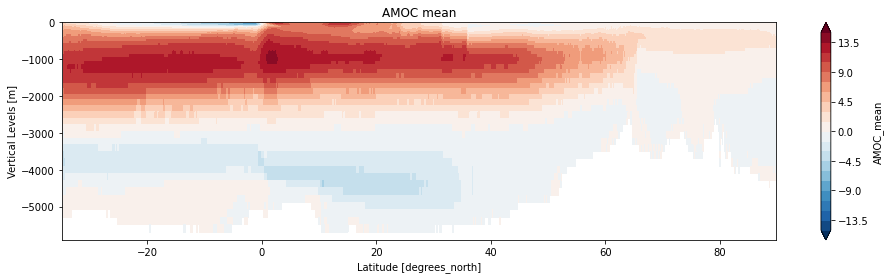

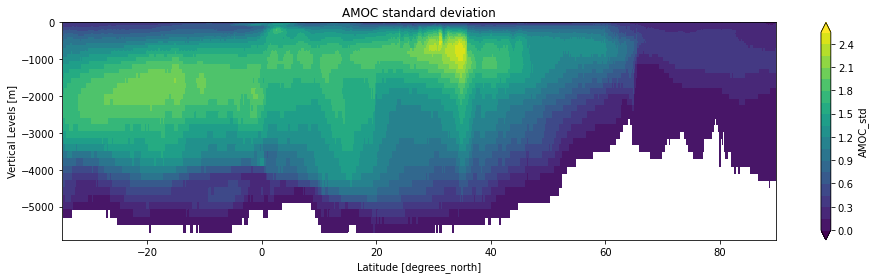

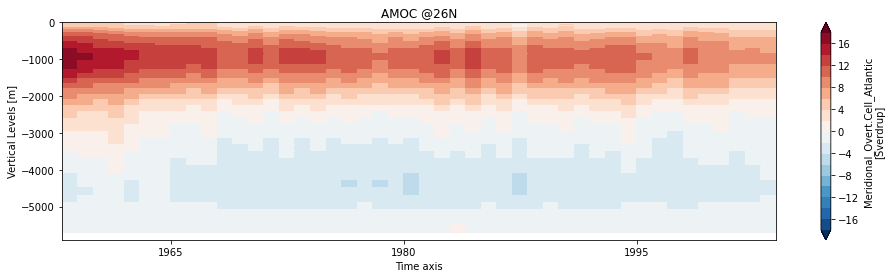

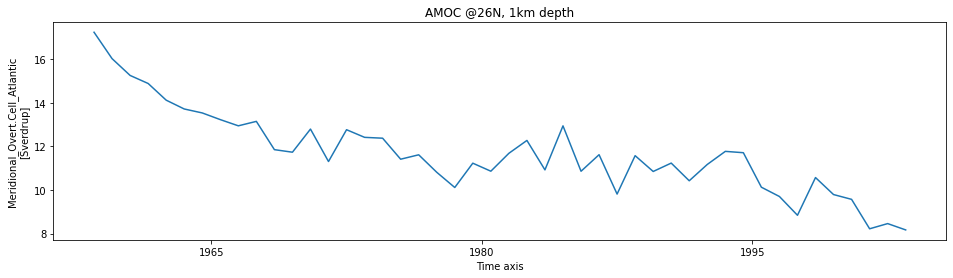

In [21]:
amoc_plot(AMOC)